<a href="https://colab.research.google.com/github/garfield-gray/manim/blob/main/3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pre

In [1]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease [1,581 B]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,158 kB]
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,343 kB

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.7/797.7 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.1 MB/s eta 0:00:00
  Attempting uninstall: IPython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=7.34.0, but you have ipython 8.13.2 which is incompatible.


In [1]:
from manim import *
import numpy as np

Manim Community v0.17.3

#CODE


3d manimations take too long to render!

In [2]:
%%manim -qh -v WARNING First

class First(ThreeDScene):
  def construct(self):
    ax_3d = ThreeDAxes()

    func = ax_3d.plot_parametric_curve(lambda t: np.array([np.cos(t), np.sin(t), t/2]), t_range = [-6, 6, 0.01], color = RED)


    self.add(ax_3d, func)
    self.set_camera_orientation(phi = 50*DEGREES)
    self.move_camera(theta= 50*DEGREES, run_time = 5)
    self.wait()

In [ ]:
%%manim -qh -v WARNING Fir

class Fir(ThreeDScene):
  def construct(self):
    resolution_fa = 18
    ax_3d = ThreeDAxes()

    func = ax_3d.plot_parametric_curve(lambda t: np.array([np.cosh(t), np.sinh(t), 3*t]), t_range = [-2, 2, 0.01], color = RED)

    def param_surface(u, v):
      y = u
      x = (y**2+1)**0.5
      z = v
      return x
    
    surface_plane = Surface(
      lambda u, v: ax_3d.c2p(param_surface(u, v), u, v),
        resolution=(resolution_fa, resolution_fa),
          v_range=[-6, 6],
          u_range=[-3, 3],
          )
    surface_plane.set_style(fill_opacity=0.5)
  # surface_plane.set_fill_by_value(axes=axes, colorscale=[(RED, -0.5), (YELLOW, 0), (GREEN, 0.5)], axis=2)



    self.add(ax_3d, func, surface_plane)
    self.set_camera_orientation(phi = 45*DEGREES)
    self.move_camera(theta= 50*DEGREES, run_time = 5)
    self.wait()

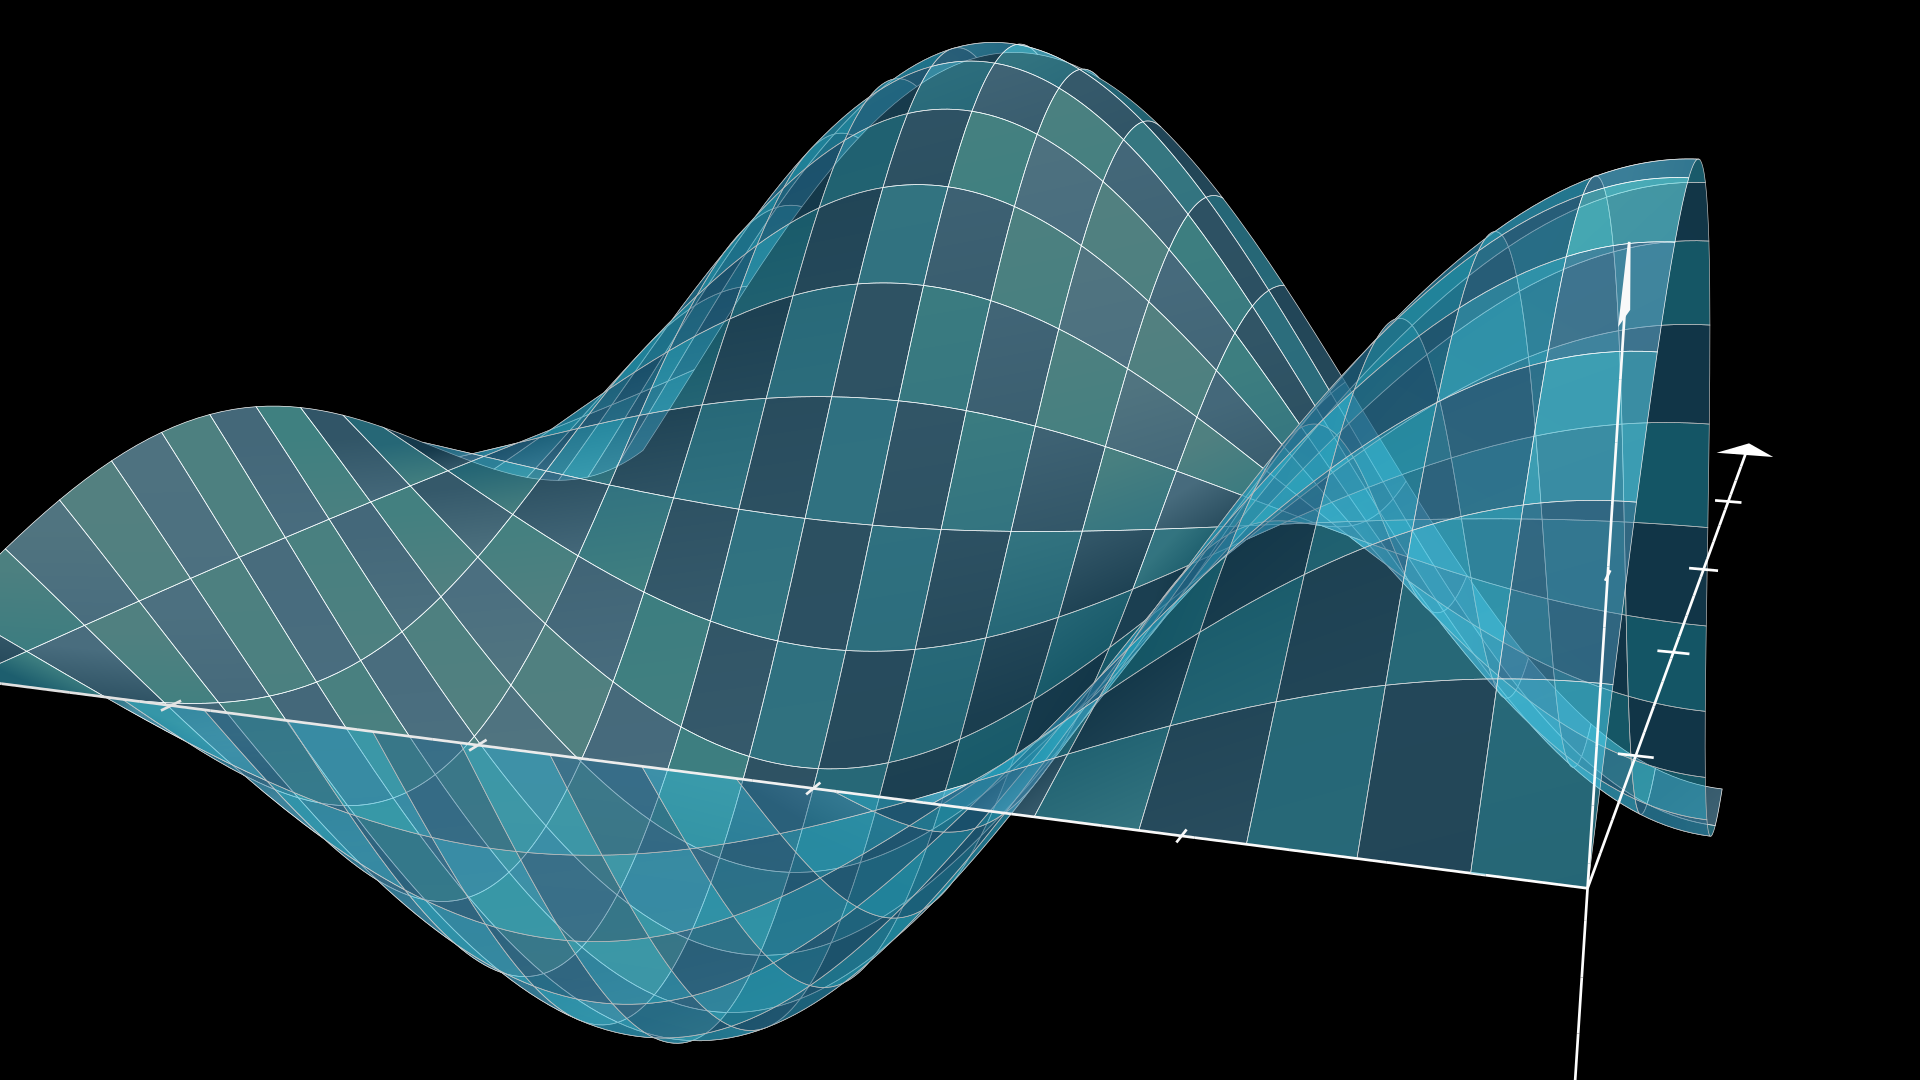

In [14]:
#surface
%%manim -qh -v WARNING FillByValueExample

class FillByValueExample(ThreeDScene):
    def construct(self):
        resolution_fa = 18
        self.set_camera_orientation(phi=75 * DEGREES, theta=-160 * DEGREES)
        axes = ThreeDAxes(x_range=(0, 5, 1), y_range=(0, 5, 1), z_range=(-1, 1, 0.5))
        def param_surface(u, v):
            x = u
            y = v
            z = np.sin(x) * np.cos(y)
            return z
        surface_plane = Surface(
            lambda u, v: axes.c2p(u, v, param_surface(u, v)),
            resolution=(resolution_fa, resolution_fa),
            v_range=[0, 5],
            u_range=[0, 5],
            )
        surface_plane.set_style(fill_opacity=0.5)
        # surface_plane.set_fill_by_value(axes=axes, colorscale=[(RED, -0.5), (YELLOW, 0), (GREEN, 0.5)], axis=2)
        self.add(axes, surface_plane)

In [36]:
%%manim -qh -v WARNING Pyramid

class Pyramid(ThreeDScene):
  def construct(self):
    ax_3d = ThreeDAxes(
        x_range = [-5,6,1],
        y_range = [-5,6,1],
        z_range = [-5,6,1],
        axis_config= {"include_numbers":True}
    )

    func = ax_3d.plot_parametric_curve(lambda t: np.array([np.cos(t), np.sin(t), t/2]), t_range = [-6, 6, 0.01], color = RED)

    resolution_fa = 20
    def param_surface(u, v):
      x = u
      y = v
      z = 1-x-y
      return z

    surface_plane = Surface(
            lambda u, v: ax_3d.c2p(u, v, param_surface(u, v)),
            resolution=(resolution_fa, resolution_fa),
            v_range=[-4, 5],
            u_range=[-4, 5],
            fill_color = "#29ca82",
            fill_opacity = 1
            )
    

    curve = ax_3d.plot(lambda x: 1-x, color=DARK_BLUE)
    area = ax_3d.get_area(
        curve,
        x_range=(0, 1),
        color=(GREEN_B, GREEN_D),
        opacity=1,
        )

    self.set_camera_orientation(phi = 60*DEGREES, theta = 45*DEGREES)
    self.play(Create(ax_3d), run_time=3)
    # self.add(ax_3d)
    self.move_camera(zoom= 2, run_time = 5)
    self.play(Create(surface_plane),run_time=3)
    # self.add(surface_plane)
    self.move_camera(phi = 30*DEGREES, run_time = 5)



    self.wait(4)

    self.play(surface_plane.animate.set_opacity(0.5), run_time= 2)

    self.play(Create(area), run_time = 2)
    self.wait(4)



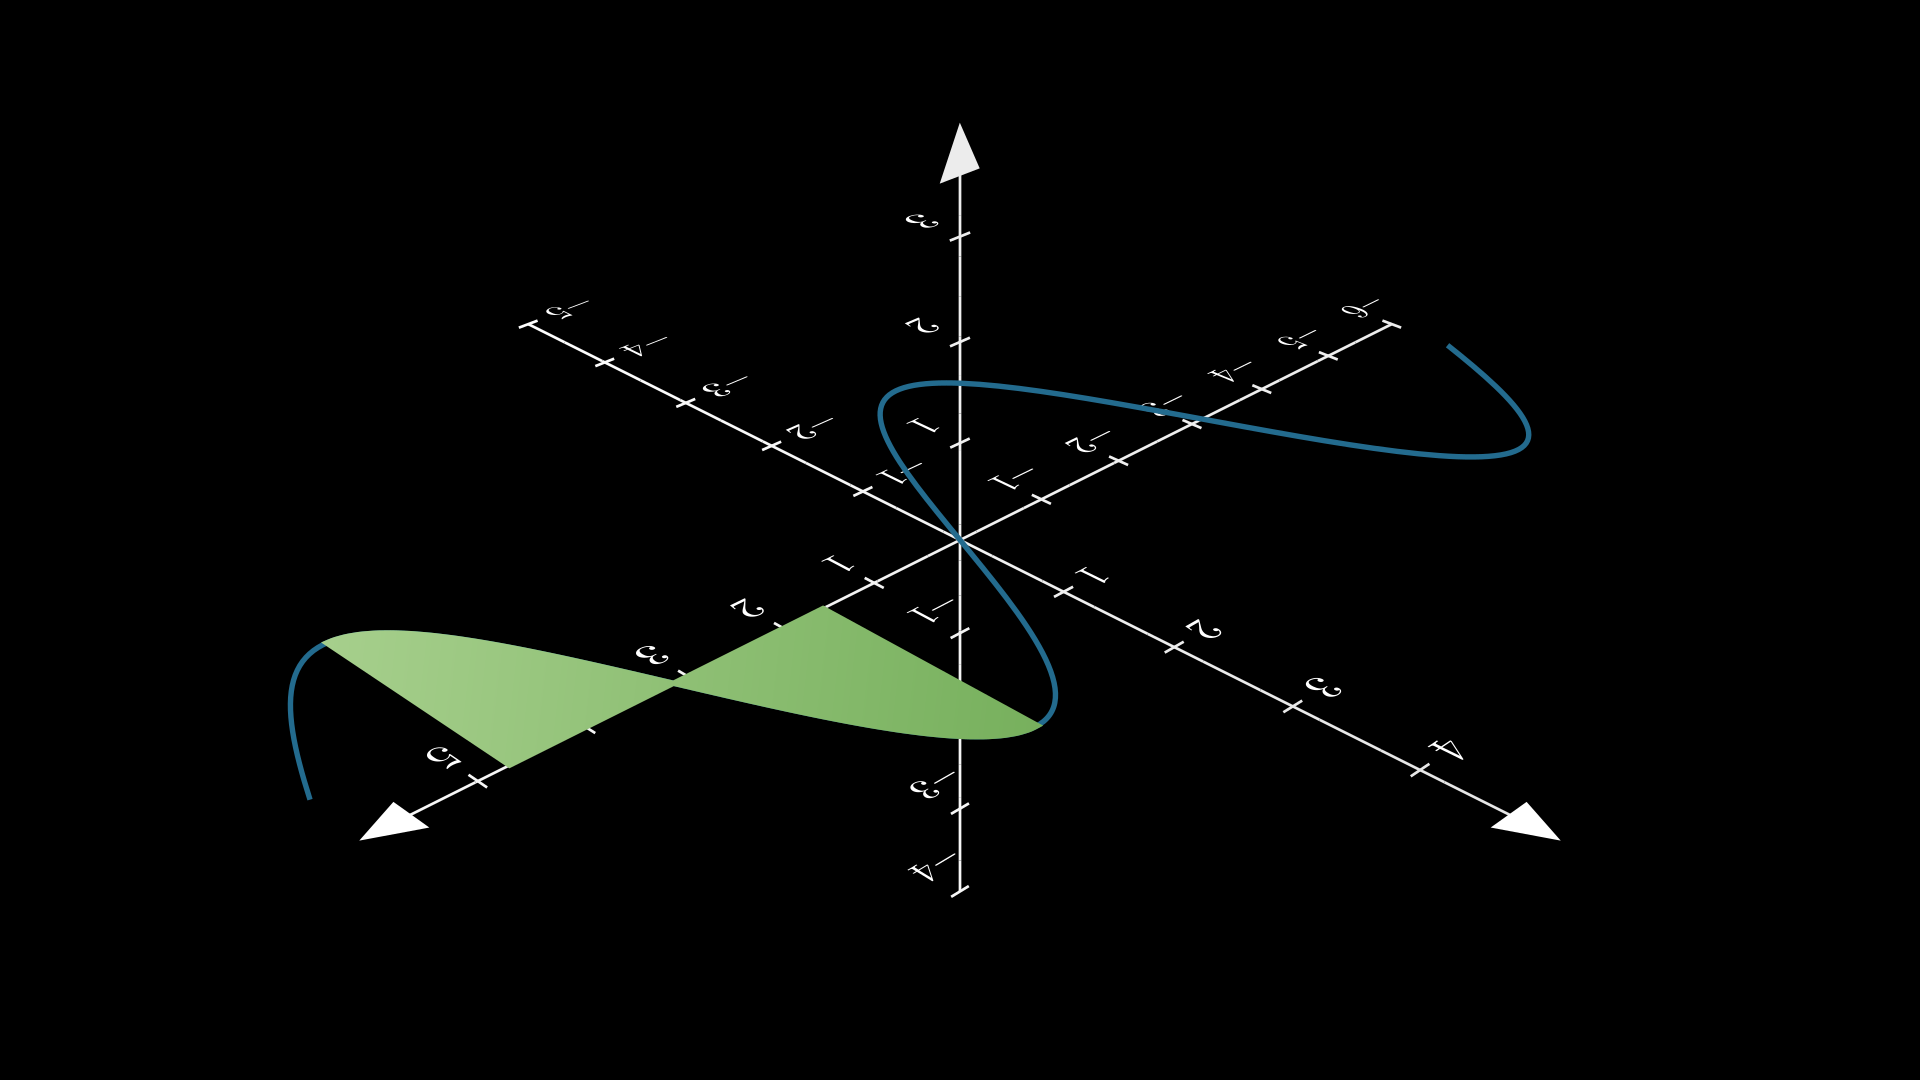

In [33]:
  %%manim -qh -v WARNING GetAreaExample


class GetAreaExample(ThreeDScene):
    def construct(self):
        ax = ThreeDAxes().add_coordinates()
        curve = ax.plot(lambda x: 2 * np.sin(x), color=DARK_BLUE)
        area = ax.get_area(
            curve,
            x_range=(PI / 2, 3 * PI / 2),
            color=(GREEN_B, GREEN_D),
            opacity=1,
        )
        self.set_camera_orientation(phi = 60*DEGREES, theta = 45*DEGREES)
        self.add(ax, curve, area)